## Mortality in Moscow 2010-2020


The following research is based on [this dataset](https://www.kaggle.com/vitaliymalcev/mortaliy-moscow-20102020), which describes dynamics in population growth in Moscow from 2010 to 2020.

### Project description
Find a dataset with text data and analyze it the following way.
1. Output descriptive statistics of the dataset: mean, median, standard deviation. Do this for at least 3 numerical fields.
2. Plot at least 3 numerical fields. Choose the plot type based on the data. It may make more sense to do a scatterplot, a regular plot, a histogram or something else.
3. Do at least 2 comparisons similar to the ones in the Titanic example. "What are the distributions of the column A for different values of the column B?" Output as either numbers or plots.
4. Describe your results in 2-3 paragraphs of text. What you can see from the plot, from the statistics and comparisons.

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(12,8)})

### Features

| Name                                    | Description                                             |
|-----------------------------------------|:-------------------------------------------------------:|
| Year | year of observation |
| Month | month of observation |
| StateRegistrationOfBirth | number of births |
| NumberOfBirthCertificatesForBoys | number of births (boys) |
| NumberOfBirthCertificatesForGirls | number of births (girls) |
| StateRegistrationOfDeath | number of deaths |
| StateRegistrationOfMarriage | number of marriages |
| StateRegistrationOfDivorce | number of divorces |
| StateRegistrationOfPaternityExamination | number of state registrations of being someone's father |
| StateRegistrationOfAdoption | number of adoptions |
| StateRegistrationOfNameChange | number of name changes |
| TotalPopulationThisYear | population for particular year |

In [3]:
df = pd.read_csv('data/moscow_stats.csv')

### Data preprocessing

I'm going to set **ID** as index and create a new column **Date**, which combines **Month** and **Year**.

In [55]:
if df.index.name != 'ID':
    df.set_index('ID', inplace=True)
df['Date'] = df[['Month', 'Year']].apply(lambda x: ','.join(map(str, x)), axis=1)

In [56]:
df.head()

,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalPopulationThisYear,Date
ID,,,,,,,,,,,,,
1,2010,January,9206,4785,4421,10430,4997,3302,1241,95,491,11503501,"January,2010"
2,2010,February,9060,4656,4404,9573,4873,2937,1326,97,639,11503501,"February,2010"
3,2010,March,10934,5630,5304,10528,3642,4361,1644,147,717,11503501,"March,2010"
4,2010,April,10140,5278,4862,9501,9698,3943,1530,128,642,11503501,"April,2010"
5,2010,May,9457,4825,4632,9482,3726,3554,1397,96,492,11503501,"May,2010"


### Descriptive statistics

Let's see the descriptive statistics of the number of birth certificates for boys and girls and of the number of state registration of death.

In [6]:
df[['NumberOfBirthCertificatesForBoys', 'NumberOfBirthCertificatesForGirls', 'StateRegistrationOfDeath']].describe()

,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath
count,124.000000,124.000000,124.000000
mean,5765.685484,5411.354839,9992.145161
std,626.414424,582.151814,903.146025
min,2042.000000,1917.000000,8520.000000
25%,5458.000000,5119.250000,9463.500000
50%,5820.500000,5430.500000,9831.000000
75%,6115.250000,5748.750000,10264.250000
max,7082.000000,6646.000000,15016.000000


On average boys and girls are born almost equally often. Also, number of births prevails the number of deaths.

Notice, how large **std** of deaths in comparison to births, so there are months with elevated mortality compared to mean one.

**Mean** and **median** values are almost the same, so we can conclude the distribution doesn't have heavy blow outs.

### How total population has changed over years?

Despite the steady growth of population, it hasn't changed significantly, just for about 1 million people. A boost in 2010-2011 probably is connected with decline of economic crisis of 2008 and sort of liberal rule of Medvedev.

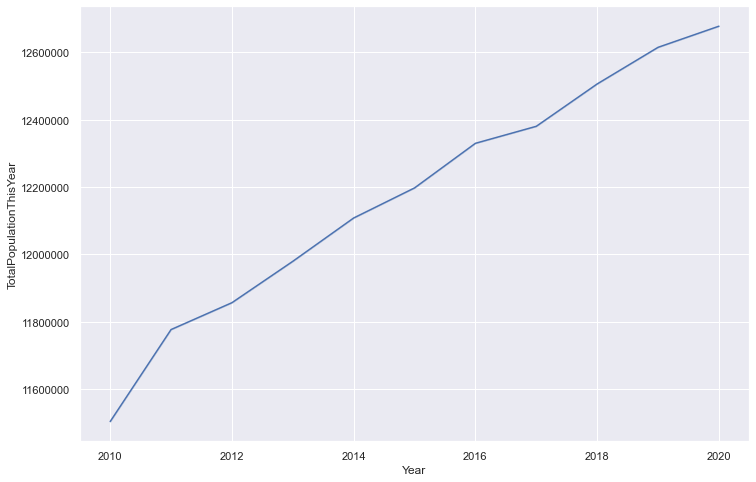

In [13]:
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Year', y='TotalPopulationThisYear', data=df);

### Distribution of state registrations of birth grouped by months

We can see that on average summer is a common season to have a baby, while in winter there is the least number of births.

Also, notice how big the confidence interval in April (which denoted as a **black line**), hence, there is a mysterious solid dispersion. As babies, which are born in April, are conceived in July or August, there is a room for assumptions and guesses, why the distribution behaves like this.

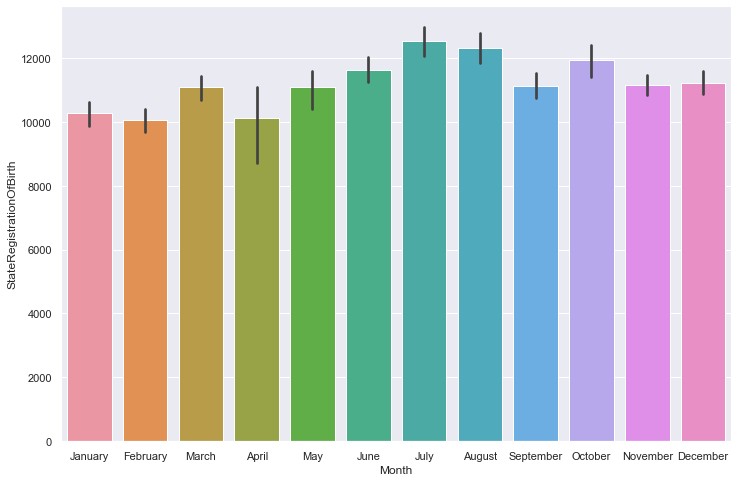

In [10]:
sns.barplot(x='Month', y='StateRegistrationOfBirth', data=df);

### Distribution of deaths during 10 years

We can see an anomaly jump in the summer of 2010. Apparently, it is connected with *a heat wave that fanned wildfires and blanketed Moscow with acrid smoke pushed up the number of deaths in Russia by nearly a fifth in July and August that year*. Basically, on average most of deaths occur in winter, causes of which can be increase of car accidents or the earlier darkness, which connected with criminal activity.

In [92]:
df.groupby('Month').mean().nlargest(5, 'StateRegistrationOfDeath')

,Year,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalPopulationThisYear
Month,,,,,,,,,,,
January,2015.0,10262.454545,5275.363636,4987.090909,10900.272727,4266.000000,3499.000000,1287.818182,73.090909,604.000000,1.217571e+07
December,2014.5,11211.500000,5794.600000,5416.900000,10450.700000,6477.100000,4174.500000,1512.500000,89.000000,790.000000,1.212548e+07
March,2015.0,11074.363636,5719.090909,5355.272727,10386.272727,5034.818182,4040.000000,1495.636364,87.545455,822.090909,1.217571e+07
October,2014.5,11925.700000,6132.900000,5792.800000,10240.900000,7908.000000,3952.000000,1557.500000,83.100000,838.100000,1.212548e+07
April,2015.0,10110.727273,5222.363636,4888.363636,10046.181818,6845.454545,3660.818182,1353.000000,82.454545,684.545455,1.217571e+07


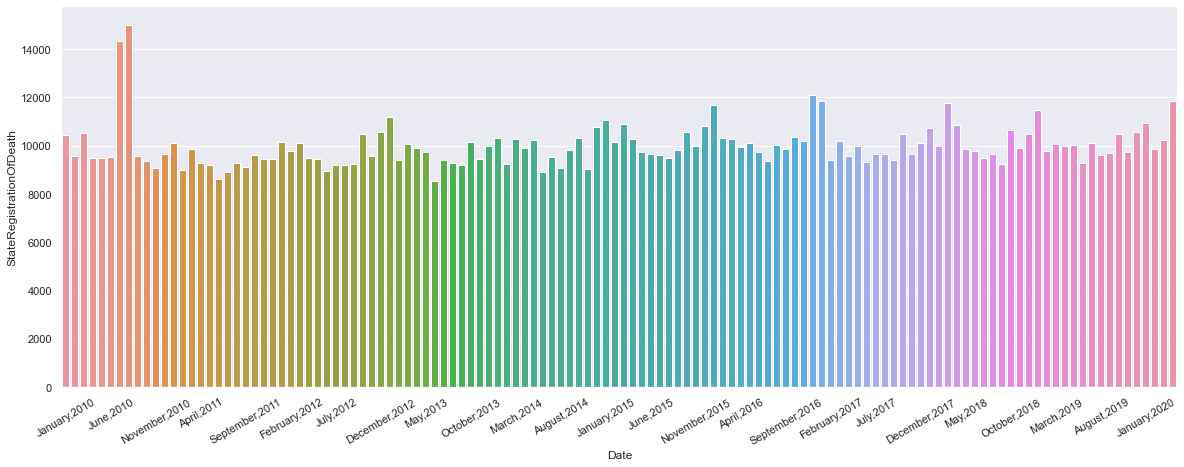

In [77]:
step = 5
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x='Date', y='StateRegistrationOfDeath', data=df, ax=ax)
ax.set_xticks(range(0, len(df['Date']), step))
ax.set_xticklabels(df['Date'][::step], rotation=30)
plt.show()

### Connection of paternity examination with the number of divorces

We can see a cloud of points, probably meaning that the number of divorces is in the direct ratio of the number of paternity examinations. Maybe, this dependence is represented as a linear function and we could draw a line in the middle of that "cloud" to somehow predict future values.

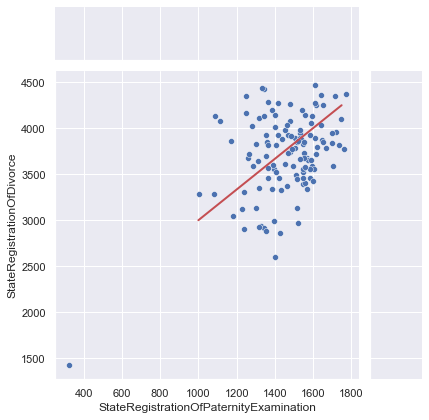

In [116]:
grid = sns.JointGrid(x='StateRegistrationOfPaternityExamination', y='StateRegistrationOfDivorce', data=df)
grid.plot_joint(sns.scatterplot);
plt.plot([1000, 1750], [3000, 4250], linewidth=2, color='r');

### Dependence of births from the number of adoptions

It is not obvious in what relation these features are, but we can make an assumption that babies are born as well as kids being adopted until some peak point from which people do not see any sense of conceiving a baby and rather trying to adopt a child. I tried to show this behaviour as a parabola with downwards branches.

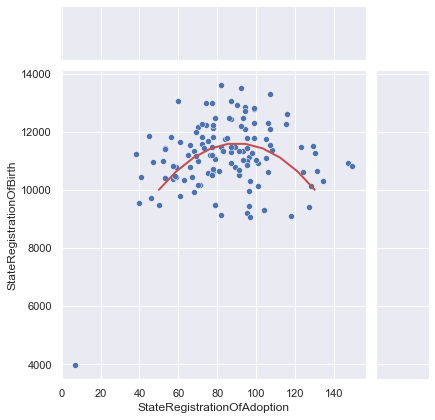

In [127]:
grid = sns.JointGrid(x='StateRegistrationOfAdoption', y='StateRegistrationOfBirth', data=df)
grid.plot_joint(sns.scatterplot)
X = np.linspace(50, 130, 10)
Y = -X**2 + 180*X + 3500
plt.plot(X, Y, linewidth=2, color='r');

### Conclusion

It was rather interesting to deduce the correlation of features and why the distrubutions behave in a certain way for a specific period of time. But it could be nicer having some more features connected with economics, GDP, e.t.c to make more clear assumptions.